# PKI Ind

# Text Summarization Menggunakan Metode Maximum Marginal Relevance (MMR)


## Pada proyek ini kita menggunakan tools (paket) sastrawi untuk melakukan stemming pada teks. Kenapa menggunakan tools ini, karena memang kita akan meringkas teks yang berbahasa Indonesia.

In [1]:
# Install modul sastrawi

!pip install sastrawi

     |████████████████████████████████| 209 kB 5.6 MB/s 


# Import modul (tools)

In [2]:
# Import medul

import re   # reguler ekspresi
# import sys  # untuk argv (tapi untuk Linux dan lokal)
import requests # untuk reques data dari repo github misalnya
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # stemming pakai sastrawi
from sklearn.feature_extraction.text import CountVectorizer # Vector 
from sklearn.metrics.pairwise import cosine_similarity # cosine similarity

import operator # operator artimatika dll

# Tahap Stemming pada teks berbahasa Indonesia

In [3]:
# Membuat stemmer pakai sastrawi

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Load stopwords list dari repo github, yang akan dipakai untuk menghapus stopwords yang ada di teks

In [4]:
# Load Stopwords dengan mengambil dari link url repo github

def load_stopWords():
	url = "https://raw.githubusercontent.com/Handit14/OrbitFutureAcademy_KampusMerdeka/main/Materi/Natural%20Language%20Processing/stopwordlist.txt"
	ina_stopword = requests.get(url).content
	return ina_stopword.split()

stopwords = load_stopWords()

# Kita bisa melihat list stopwords dengan run stopwords

In [5]:
# Tampilkan isi stopwordlist

stopwords

[b'zahwa',
 b'laweyan',
 b'sriwedari',
 b'sang',
 b'aantasyaf',
 b'menurutku',
 b'chi',
 b'partecipa',
 b'al',
 b'tuo',
 b'piacere',
 b'ma',
 b'non',
 b'al',
 b'la',
 b'doloreperde',
 b'chiave',
 b'una',
 b'delle',
 b'sette',
 b'portedel',
 b'paradisopuoi',
 b'dimenticare',
 b'persona',
 b'con',
 b'cui',
 b'hai',
 b'piantokhalil',
 b'gibranangelo',
 b'tristesecoloartista',
 b'sconosciuto',
 b'a',
 b'ada',
 b'aja',
 b'adalah',
 b'adakah',
 b'adanya',
 b'adapun',
 b'agak',
 b'agaknya',
 b'agar',
 b'akan',
 b'akankah',
 b'akhir',
 b'akhiri',
 b'akhirilah',
 b'akhirnya',
 b'aku',
 b'akulah',
 b'akupun',
 b'amat',
 b'amati',
 b'amatilah',
 b'amatlah',
 b'anda',
 b'andalah',
 b'antar',
 b'antara',
 b'antaranya',
 b'apa',
 b'apaan',
 b'apabila',
 b'apakah',
 b'apalagi',
 b'apalah',
 b'apatah',
 b'arti',
 b'artinya',
 b'asal',
 b'asalkan',
 b'asalnya',
 b'atas',
 b'atasi',
 b'atasnya',
 b'atau',
 b'ataukah',
 b'ataupun',
 b'awal',
 b'awalnya',
 b'bagai',
 b'bagaikan',
 b'bagaimana',
 b'bagaima

## Membuat fungsi untuk stemmer

In [6]:
# Fungsi proses stemming kata

def cleanData(sentence):
	#sentence = re.sub('[^A-Za-z0-9 ]+', '', sentence)
	#sentence filter(None, re.split("[.!?", setence))
	ret = []
	sentence = stemmer.stem(sentence)	
	for word in sentence.split():
		if not word in stopwords:
			ret.append(word)
	return " ".join(ret)

## Membuat fungsi untuk vektor kata

In [7]:
# Fungsi untuk membuat vektor kata

def getVectorSpace(cleanSet):
	vocab = {}
	for data in cleanSet:
		for word in data.split():
			vocab[data] = 0
	return vocab.keys()

## Membuat fungsi untuk menghitung cosine similarity

In [8]:
# Fungsi untuk menghitung cosine similarity

def calculateSimilarity(sentence, doc):
	if doc == []:
		return 0
	vocab = {}
	for word in sentence:
		vocab[word] = 0
	
	docInOneSentence = '';
	for t in doc:
		docInOneSentence += (t + ' ')
		for word in t.split():
			vocab[word]=0	
	
	cv = CountVectorizer(vocabulary=vocab.keys())

	docVector = cv.fit_transform([docInOneSentence])
	sentenceVector = cv.fit_transform([sentence])
	return cosine_similarity(docVector, sentenceVector)[0][0]

# Load raw data teks dari repo github

In [9]:
# Load raw data text yang akan di ringkas

r = requests.get('https://raw.githubusercontent.com/Handit14/OrbitFutureAcademy_KampusMerdeka/main/Materi/Natural%20Language%20Processing/news_data4.txt')
r.encoding = r.apparent_encoding
texts = r.text.split('\n')

In [10]:
# Menampilkan text yang akan di ringkas

texts

['Pemerintah memutuskan pembayaran Tunjangan Hari Raya (THR) atau gaji ke-14 dan gaji ke-13 tidak sekaligus. Gaji ke-14 rencananya akan dibayarkan terlebih dahulu, yaitu bulan Juni ini, sementara gaji ke-13 baru akan dibayarkan pada Juli mendatang.',
 '',
 'Deputi SDM Aparatur Kementerian Pendayagunaan Aparatur Negara dan Reformasi Birokrasi (PANRB) Setiawan Wangsaatmadja membenarkan hal itu. Ia menjelaskan, pembayaran gaji ke-14 dan gaji ke-13 tidak bisa dibayarkan sekaligus dikarenakan kondisi keuangan negara.',
 '',
 '“Saat rapat terakhir, Kementerian Keuangan menyatakan bahwa cashflow tidak mendukung untuk melaksanakan pembayaran gaji ke-13 danTHR sekaligus,” kata Setiawan, seperti dikutip dalam lamanSetkab.go.id, Kamis (2/6/2016).',
 '',
 'Menurut Setiawan, ketentuan mengena gaji ke-13 dan THR tersebut dituangkan dalam dua Peraturan Pemerintah (PP). “Saat ini RPP-nya sudah selesai diharmonisasi dan sudah diserahkan ke Kementerian Sekretariat Negara untuk selanjutnya ditandatangani

In [11]:
# import time
# start = time.time()

%%time

sentences = []
clean = []
originalSentenceOf = {}

#Data cleansing
for line in texts:
	parts = line.split('.')
	for part in parts:
		cl = cleanData(part)
		#print cl
		sentences.append(part)
		clean.append(cl)
		originalSentenceOf[cl] = part		
setClean = set(clean)
		

CPU times: user 4.24 s, sys: 26.9 ms, total: 4.27 s
Wall time: 4.29 s


## Menghitung nilai cosine similarity

In [12]:
#calculate Similarity score each sentence with whole documents		
scores = {}
for data in clean:
	temp_doc = setClean - set([data])
	score = calculateSimilarity(data, list(temp_doc))
	scores[data] = score
	#print score

# Untuk menghitung summarization kita menggunakan Algoritma MMR

Algoritma MMR (Maximum Marginal Relevance) merupakan metode ekstraksi ringkasan yang digunakan untuk meringkas dokumen tunggal maupun multi dokumen.

MMR meringkas dokumen dengan melakukan  perhitungan  kesamaan antara bagian teks. Pada peringkasan   dokumen dilakukan proses segmentasi dokumen menjadi kalimat dan dilakukan pengelompokan sesuai dengan gender kalimat tersebut.

MMR digunakan dengan mengkombinasikan matrik cosine similarity untuk merangking kalimat-kalimat sebagai tanggapan pada query yang diberikan oleh user.


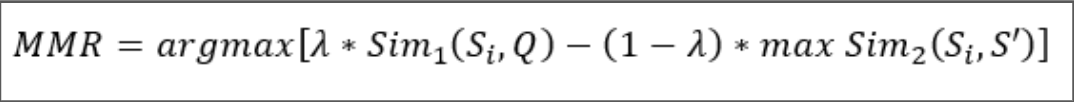

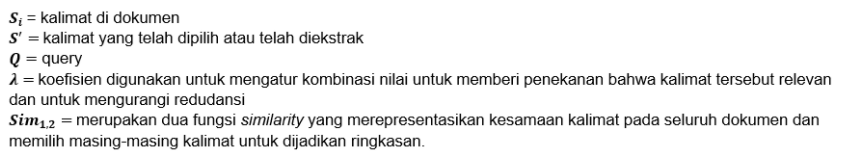

In [13]:
#calculate MMR
n = 20 * len(sentences) / 100
alpha = 0.5
summarySet = []
while n > 0:
	mmr = {}
	#kurangkan dengan set summary
  # Removed dict.iteritems(), dict.iterkeys(), and dict.itervalues().
  # Instead: use dict.items(), dict.keys(), and dict.values() respectively.

	for sentence in scores.keys():
		if not sentence in summarySet:
			mmr[sentence] = alpha * scores[sentence] - (1-alpha) * calculateSimilarity(sentence, summarySet)	
	selected = max(mmr.items(), key=operator.itemgetter(1))[0]	
	summarySet.append(selected)
	n -= 1

#rint str(time.time() - start)

## Menampilkan hasil Summary dari hasil perhitungan Algoritma MMR

In [14]:
# Menampilkan hasil Summary

print ('\nSummary (hasil teks yang diringkas):\n')
for sentence in summarySet:
	print (originalSentenceOf [sentence].lstrip(' '))
print ('')


Summary (hasil teks yang diringkas):

Pemerintah memutuskan pembayaran Tunjangan Hari Raya (THR) atau gaji ke-14 dan gaji ke-13 tidak sekaligus
“Saat ini RPP-nya sudah selesai diharmonisasi dan sudah diserahkan ke Kementerian Sekretariat Negara untuk selanjutnya ditandatangani Presiden,” terang Setiawan
Untuk Pegawai Negeri Sipil (PNS), anggota TNI/POLRI, gaji ke-13 itu meliputi gaji pokok, tunjangan keluarga, tunjangan jabatan atau tunjangan umum dan tunjangan kinerja
Ia menjelaskan, pembayaran gaji ke-14 dan gaji ke-13 tidak bisa dibayarkan sekaligus dikarenakan kondisi keuangan negara
Untuk THR, akan diberikan sebesar gaji pokok
id, Kamis (2/6/2016)



## Menampilkan perbandingan Summary text dengan teks asli sebelum si summary. Setiap kalimat yang di jadikan sebagai summary akan di highlight kuning.

In [15]:

print ('=============================================================')
print ('\nOriginal Passages (Teks Asli):\n')
from termcolor import colored # tools untuk membuat highlight merah

for sentence in clean:
	if sentence in summarySet:
		print (colored(originalSentenceOf[sentence].lstrip(' '), 'yellow'))
	else:
		print (originalSentenceOf[sentence].lstrip(' '))


Original Passages (Teks Asli):

Pemerintah memutuskan pembayaran Tunjangan Hari Raya (THR) atau gaji ke-14 dan gaji ke-13 tidak sekaligus
Gaji ke-14 rencananya akan dibayarkan terlebih dahulu, yaitu bulan Juni ini, sementara gaji ke-13 baru akan dibayarkan pada Juli mendatang


Deputi SDM Aparatur Kementerian Pendayagunaan Aparatur Negara dan Reformasi Birokrasi (PANRB) Setiawan Wangsaatmadja membenarkan hal itu
Ia menjelaskan, pembayaran gaji ke-14 dan gaji ke-13 tidak bisa dibayarkan sekaligus dikarenakan kondisi keuangan negara


“Saat rapat terakhir, Kementerian Keuangan menyatakan bahwa cashflow tidak mendukung untuk melaksanakan pembayaran gaji ke-13 danTHR sekaligus,” kata Setiawan, seperti dikutip dalam lamanSetkab
go
id, Kamis (2/6/2016)


Menurut Setiawan, ketentuan mengena gaji ke-13 dan THR tersebut dituangkan dalam dua Peraturan Pemerintah (PP)
“Saat ini RPP-nya sudah selesai diharmonisasi dan sudah diserahkan ke Kementerian Sekretariat Negara untuk selanjutnya ditandatan